In [1]:
import numpy as np
import matplotlib.pyplot as plt

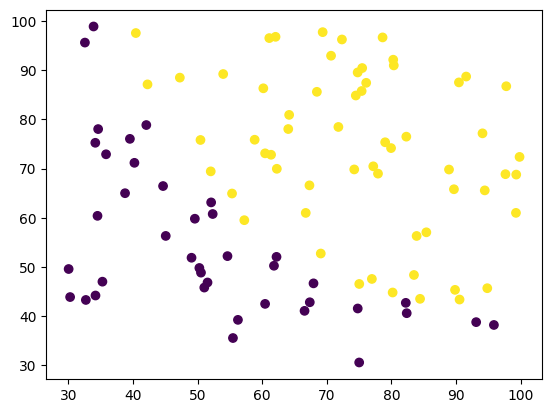

In [2]:
data = np.loadtxt("ex2data1.csv", delimiter=",")
x_train = data[:, :2]
y_train = data[:, 2]
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def model(x, w, b):
    return sigmoid(np.dot(x, w) + b)


def cost(x, y, w, b):
    m = x.shape[0]
    f = model(x, w, b)
    loss = -y * np.log(f) - (1 - y) * np.log(1 - f)
    cost = np.sum(loss) / m
    return cost


def gradient(x, y, w, b):
    m, n = x.shape
    f = model(x, w, b)
    dj_dw = np.sum((f - y)[:, np.newaxis] * x, axis=0) / m
    dj_db = np.sum(f - y) / m
    return dj_dw, dj_db


def plot_contour(x_train, y_train, w, b, x1_range, x2_range):
    x1_plot, x2_plot = np.meshgrid(x1_range, x2_range)
    y_predicted = model(np.column_stack((x1_plot.flatten(), x2_plot.flatten())), w, b)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    contour = plt.contour(x1_plot, x2_plot, y_predicted.reshape(x1_plot.shape))
    plt.clabel(contour, inline=True)
    plt.show()


def gradient_descent(x, y, alpha, iterations):
    m, n = x.shape
    w = np.zeros(n)
    b = 0
    costs = []
    for i in range(iterations):
        dj_dw, dj_db = gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        costs.append(cost(x, y, w, b))
        if i % (iterations // 5) == 0:
            plot_contour(x, y, w, b, np.arange(30, 100, 1), np.arange(30, 100, 1))
            print(f"iteration #{i}, w = {w}, b = {b}, cost = {costs[-1]}")
    return w, b, costs

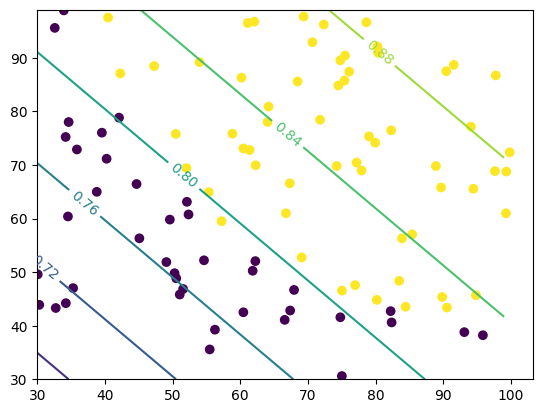

iteration #0, w = [0.01200922 0.01126284], b = 0.0001, cost = 0.6982906893667754


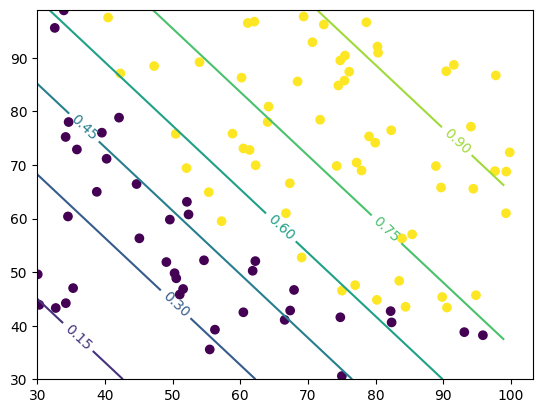

iteration #100000, w = [0.04528089 0.03819176], b = -4.8118336868230545, cost = 0.38738840596925284


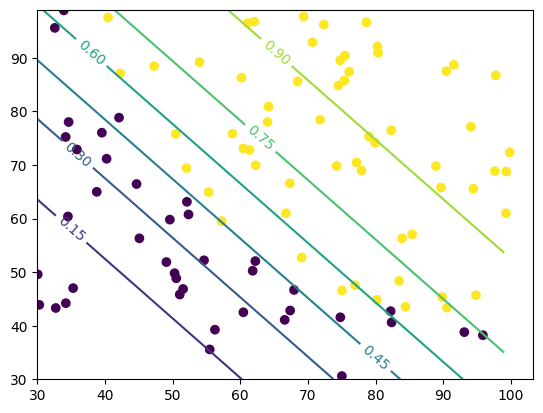

iteration #200000, w = [0.06550412 0.05898718], b = -7.450199398320865, cost = 0.3165538865279395


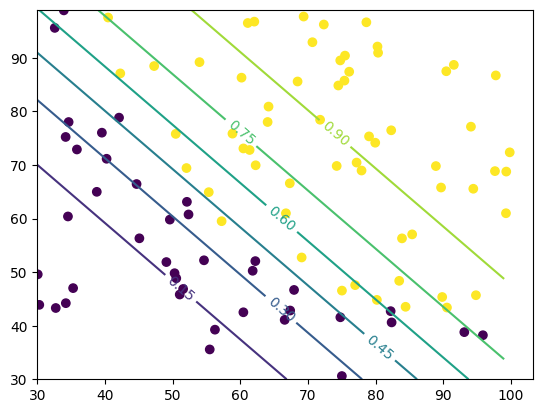

iteration #300000, w = [0.07960988 0.07329334], b = -9.255747569236807, cost = 0.2836866909356092


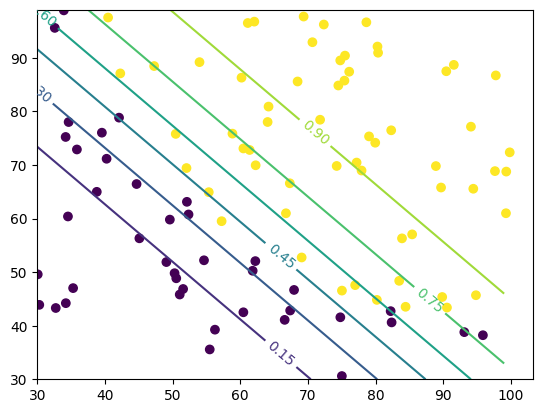

iteration #400000, w = [0.09045586 0.08425707], b = -10.63277985407652, cost = 0.26463480481517676


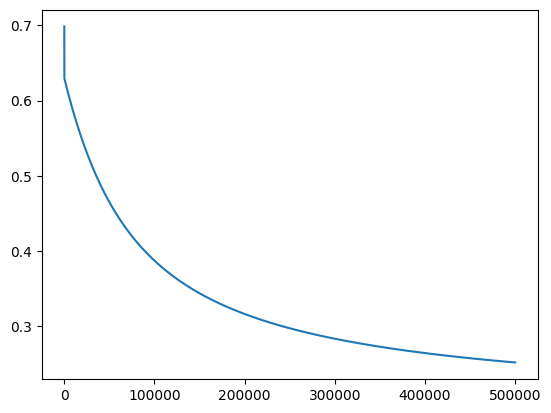

[0.09927308 0.09316497] -11.747491571852622


In [4]:
w, b, costs = gradient_descent(x_train, y_train, 0.001, 500000)
plt.plot(costs)
plt.show()
print(w, b)